In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("A:\\Machine Learning\\HR_comma_sep.csv")
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [26]:
dp = df.groupby(['salary','left']).size()
dp

salary  left
high    0       1155
        1         82
low     0       5144
        1       2172
medium  0       5129
        1       1317
dtype: int64

<Axes: xlabel='salary,left'>

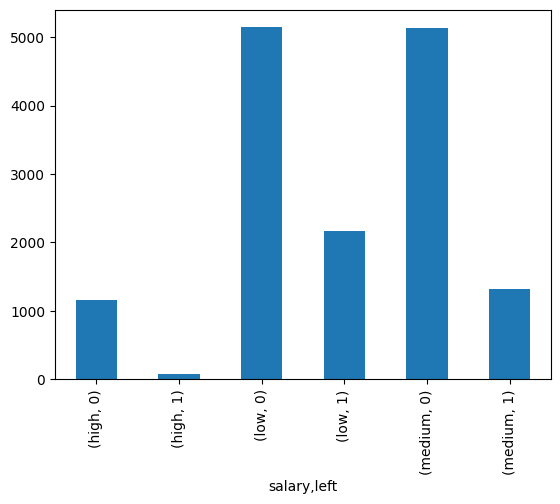

In [27]:
dp.plot.bar()

In [28]:
dpp = df.groupby(['Department','left']).size()
dpp

Department   left
IT           0        954
             1        273
RandD        0        666
             1        121
accounting   0        563
             1        204
hr           0        524
             1        215
management   0        539
             1         91
marketing    0        655
             1        203
product_mng  0        704
             1        198
sales        0       3126
             1       1014
support      0       1674
             1        555
technical    0       2023
             1        697
dtype: int64

<Axes: xlabel='Department,left'>

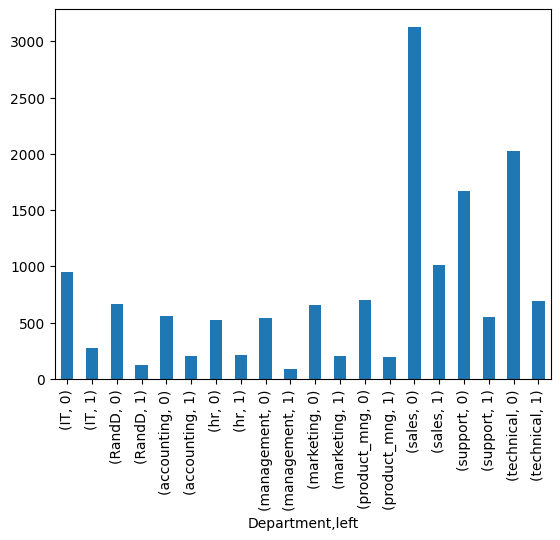

In [29]:
dpp.plot.bar()

In [42]:
dummy1 = pd.get_dummies(df['salary']).drop(['low'],axis='columns')
dummy1

,high,medium
0,False,False
1,False,True
2,False,True
3,False,False
4,False,False
...,...,...
14994,False,False
14995,False,False
14996,False,False
14997,False,False


In [41]:
dummy2 = pd.get_dummies(df['Department']).drop(['RandD'],axis='columns')
dummy2

,IT,accounting,hr,management,marketing,product_mng,sales,support,technical
0,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
14994,False,False,False,False,False,False,False,True,False
14995,False,False,False,False,False,False,False,True,False
14996,False,False,False,False,False,False,False,True,False
14997,False,False,False,False,False,False,False,True,False


In [43]:
fdf = pd.concat([df.drop(['Department','salary'],axis='columns'),dummy1,dummy2],axis='columns')
fdf

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,high,medium,IT,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,False,True,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,False,True,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,False,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,False,False,False,False,False,False,False,False,False,True,False
14995,0.37,0.48,2,160,3,0,1,0,False,False,False,False,False,False,False,False,False,True,False
14996,0.37,0.53,2,143,3,0,1,0,False,False,False,False,False,False,False,False,False,True,False
14997,0.11,0.96,6,280,4,0,1,0,False,False,False,False,False,False,False,False,False,True,False


In [46]:
X = fdf[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','high','medium','IT','accounting','hr','management','marketing','product_mng','sales','support','technical']]
y = fdf.left

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.9,random_state=10)

In [49]:
X_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,high,medium,IT,accounting,hr,management,marketing,product_mng,sales,support,technical
9292,0.18,0.96,5,208,6,0,0,False,True,False,False,False,False,False,False,False,False,True
9307,0.68,0.44,5,165,3,0,0,False,True,False,False,False,False,False,False,False,False,False
4017,0.69,0.91,4,186,3,0,0,False,False,False,False,False,False,False,False,False,True,False
14501,0.40,0.46,2,128,3,0,0,False,False,False,False,False,True,False,False,False,False,False
9243,0.14,0.63,6,215,5,0,0,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11633,0.77,0.89,4,269,10,0,0,True,False,False,False,False,True,False,False,False,False,False
1344,0.39,0.57,2,150,3,0,0,False,False,False,False,False,False,False,False,False,True,False
12815,0.80,0.67,3,236,3,1,0,False,False,False,False,False,False,False,False,False,False,False
7293,0.97,0.64,4,152,2,0,0,False,True,False,False,False,False,False,False,False,False,True


In [50]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)

C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
X_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,high,medium,IT,accounting,hr,management,marketing,product_mng,sales,support,technical
13982,0.65,0.40,5,125,4,0,0,False,False,False,False,False,False,False,False,True,False,False
822,0.41,0.50,2,128,3,0,0,False,False,False,False,False,True,False,False,False,False,False
13751,0.44,0.41,3,125,7,0,0,False,True,False,False,False,False,False,False,True,False,False
9656,0.93,0.44,5,190,5,0,0,False,True,False,False,False,False,False,False,False,False,True
13497,0.76,0.82,4,170,6,0,0,False,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5946,0.98,0.84,4,200,2,0,0,False,True,False,False,False,False,False,True,False,False,False
285,0.40,0.56,2,148,3,0,0,False,False,False,False,False,False,False,False,False,True,False
7058,0.71,0.41,5,107,4,0,0,False,True,False,False,False,False,False,False,False,False,True
6277,0.97,0.75,5,228,4,0,0,False,False,False,False,False,False,False,False,True,False,False


In [52]:
y_test

13982    0
822      1
13751    0
9656     0
13497    0
        ..
5946     0
285      1
7058     0
6277     0
9179     0
Name: left, Length: 1500, dtype: int64

In [53]:
clf.score(X_test,y_test)

0.8073333333333333

In [54]:
clf.predict_proba(X_test)

array([[0.86516283, 0.13483717],
       [0.65795491, 0.34204509],
       [0.5315168 , 0.4684832 ],
       ...,
       [0.93454721, 0.06545279],
       [0.92571021, 0.07428979],
       [0.92449487, 0.07550513]], shape=(1500, 2))